In [102]:
#another example
import numpy as np
import pandas as pd
from rfgap import RFGAP
import seaborn as sns
import matplotlib.pyplot as plt
from rfphate import RFPHATE, dataprep

In [103]:
data = pd.read_csv("./datasets/heart_disease.csv")
data

,class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,2,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,3,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,1,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [104]:
heart_disease = data.drop(['ca', 'thal','sex', 'fbs', 'exang'], axis=1)
heart_disease

,class,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,0,63,1,145,233,2,150,2.3,3
1,2,67,4,160,286,2,108,1.5,2
2,1,67,4,120,229,2,129,2.6,2
3,0,37,3,130,250,0,187,3.5,3
4,0,41,2,130,204,2,172,1.4,1
...,...,...,...,...,...,...,...,...,...
298,1,45,1,110,264,0,132,1.2,2
299,2,68,4,144,193,0,141,3.4,2
300,3,57,4,130,131,0,115,1.2,2
301,1,57,2,130,236,2,174,0.0,2


In [105]:
# x = heart_disease.iloc[:,1:-2]
# y = heart_disease.iloc[:,0]
x = heart_disease.iloc[:,1:]
y = heart_disease['class']

In [106]:
x

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,63,1,145,233,2,150,2.3,3
1,67,4,160,286,2,108,1.5,2
2,67,4,120,229,2,129,2.6,2
3,37,3,130,250,0,187,3.5,3
4,41,2,130,204,2,172,1.4,1
...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,1.2,2
299,68,4,144,193,0,141,3.4,2
300,57,4,130,131,0,115,1.2,2
301,57,2,130,236,2,174,0.0,2


In [107]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: class, Length: 303, dtype: int64

<Axes: xlabel='age', ylabel='chol'>

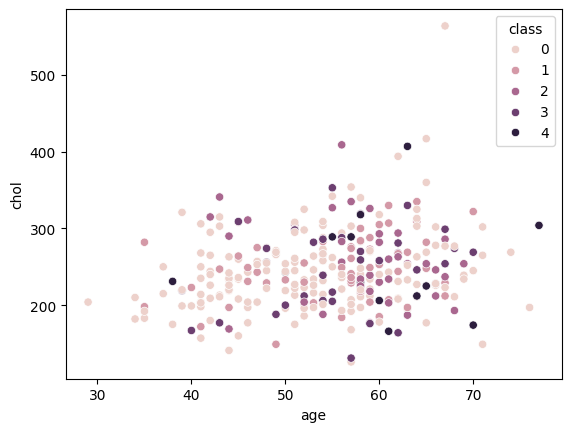

In [108]:
sns.scatterplot(x = x.iloc[:, 0], y = x.iloc[:, 3], hue = y)

In [109]:
print(heart_disease[heart_disease["class"] == 0].shape[0])
print(heart_disease[heart_disease["class"] == 1].shape[0])
print(heart_disease[heart_disease["class"] == 2].shape[0])
print(heart_disease[heart_disease["class"] == 3].shape[0])
print(heart_disease[heart_disease["class"] == 4].shape[0])

164
55
36
35
13


In [110]:
def rfOverSample(x, y, numSamples=3):

    #Train RF:
    rf = RFGAP(y = y, prediction_type = 'classification', matrix_type = 'dense')
    rf.fit(x, y)
    prox = rf.get_proximities()

    valueCounts = y.value_counts()
    majLabel = valueCounts.index[0]
    majCount = valueCounts.iloc[0]
    classCounts = valueCounts.to_dict()

    numFeatures = x.shape[1]

    for label in classCounts:
        if label != majLabel:
            upsampleSize = majCount - classCounts[label]
            newPoints = np.zeros((upsampleSize, numFeatures))

            for i in range(upsampleSize):
                sampleIndices = np.where(y == label)[0]
                samples = np.random.choice(sampleIndices, numSamples, replace=True)
                newFeatures = np.sum((np.matmul(np.transpose(x.iloc[samples,:]), prox[samples, :])), axis=1)/numSamples
                newPoints[i, : ] = newFeatures
                # print(type(newPoints))
            x = pd.concat((x, pd.DataFrame(newPoints, columns = x.columns))).reset_index(drop = True)
            y = pd.concat((y, pd.Series(np.ones_like(newPoints[ : , 0]) * label))).reset_index(drop = True)
    
    return x, y

In [111]:
x_upsampled, y_upsampled = rfOverSample(x, y)

In [112]:
print(y_upsampled[y_upsampled == 0].shape[0])
print(y_upsampled[y_upsampled == 1].shape[0])
print(y_upsampled[y_upsampled == 2].shape[0])
print(y_upsampled[y_upsampled == 3].shape[0])
print(y_upsampled[y_upsampled == 4].shape[0])

164
164
164
164
164


In [113]:
x

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,63,1,145,233,2,150,2.3,3
1,67,4,160,286,2,108,1.5,2
2,67,4,120,229,2,129,2.6,2
3,37,3,130,250,0,187,3.5,3
4,41,2,130,204,2,172,1.4,1
...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,1.2,2
299,68,4,144,193,0,141,3.4,2
300,57,4,130,131,0,115,1.2,2
301,57,2,130,236,2,174,0.0,2


<Axes: xlabel='chol', ylabel='thalach'>

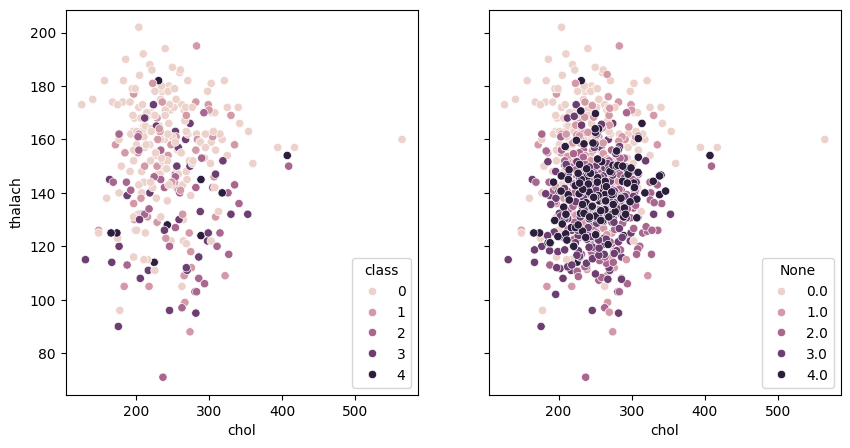

In [114]:
fig, ax = plt.subplots(1, 2,  figsize = (10, 5), sharey = True)

sns.scatterplot(x = x.iloc[:, 3], y = x.iloc[:, 5], hue = y, ax = ax[0])
sns.scatterplot(x = x_upsampled.iloc[:, 3], y = x_upsampled.iloc[:, 5], hue = y_upsampled, ax = ax[1])

In [115]:
y_upsampled.name = "class"
upsampled_heart_disease = pd.concat([y_upsampled, x_upsampled], axis = 1)
upsampled_heart_disease

,class,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,0.0,63.000000,1.000000,145.000000,233.000000,2.000000,150.000000,2.300000,3.000000
1,2.0,67.000000,4.000000,160.000000,286.000000,2.000000,108.000000,1.500000,2.000000
2,1.0,67.000000,4.000000,120.000000,229.000000,2.000000,129.000000,2.600000,2.000000
3,0.0,37.000000,3.000000,130.000000,250.000000,0.000000,187.000000,3.500000,3.000000
4,0.0,41.000000,2.000000,130.000000,204.000000,2.000000,172.000000,1.400000,1.000000
...,...,...,...,...,...,...,...,...,...
815,4.0,62.666667,3.666667,129.000000,203.333333,1.333333,140.666667,2.500000,2.333333
816,4.0,64.333333,4.000000,141.000000,253.000000,2.000000,144.000000,1.466667,1.666667
817,4.0,63.666667,4.000000,150.000000,346.333333,2.000000,140.666667,3.000000,2.000000
818,4.0,51.333333,2.333333,114.666667,230.333333,1.333333,170.666667,2.933333,2.000000


In [116]:
x_phate_upsampled, y_phate_upsampled = dataprep(upsampled_heart_disease, label_col_idx=0)
x_phate, y_phate = dataprep(heart_disease, label_col_idx=0)


In [117]:
rfphate_upsampled = RFPHATE(random_state = 42)
rfphate_original = RFPHATE(random_state = 42)

In [118]:
embedding_upsampled = rfphate_upsampled.fit_transform(x_phate_upsampled, y_phate_upsampled)
embedding = rfphate_original.fit_transform(x_phate, y_phate)


<Axes: >

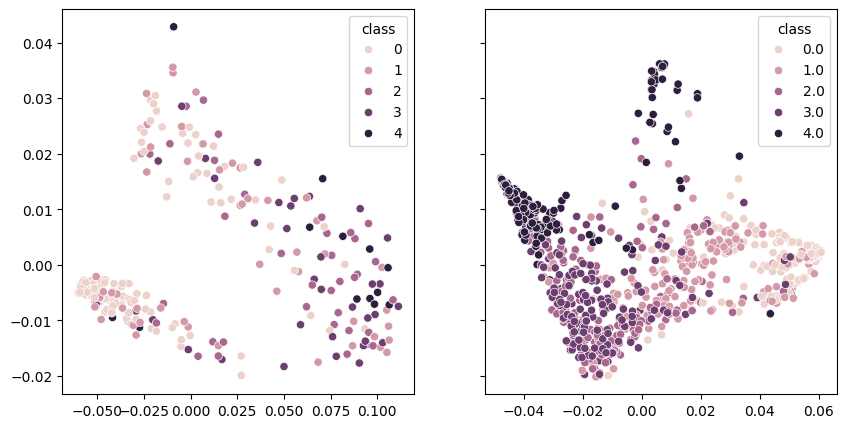

In [119]:
fig, ax = plt.subplots(1, 2,  figsize = (10, 5), sharey = True)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y_phate, ax=ax[0])
sns.scatterplot(x=embedding_upsampled[:, 0], y=embedding_upsampled[:, 1], hue=y_phate_upsampled, ax=ax[1])